# Connor Hughes ME 225ML HW1
My collaborators on this assignment were Gabby Villalpando-Torres and Sasha Davydov. 

### Initial Setup:

In [412]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf 
import numpy as np
import math
import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution()
sess = tf.compat.v1.InteractiveSession();

C:\Users\conno\anaconda3\envs\ME225_ML\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### Generate Training and Testing Data:
First, we will generate 80 training data points and 25 testing data points. The inputs x_i for both training and testing data are generated by evenly sampling on the interval [0, 4*pi] and the corresponding output data points (i.e., the labels) are simply computed as y_i = sin(x_i) + cos(x_i). The inputs and labels are both 1-dimensional. 

In [544]:
x_train = np.linspace(0, 4*math.pi, 80) 
x_train = np.asarray(x_train,dtype=np.float32);
x_train = x_train.reshape(len(x_train), 1)

y_train = np.sin(x_train) + np.cos(x_train)
y_train = y_train.reshape(len(x_train), 1)


x_test = np.linspace(0, 4*math.pi, 25) 
x_test = np.asarray(x_test,dtype=np.float32);
x_test = x_test.reshape(25, 1)

y_test = np.sin(x_test) + np.cos(x_test)
y_test = y_test.reshape(25, 1)

data_feature_dim = 1; 
label_feature_dim = 1;

### Plot Training Data to sanity check:

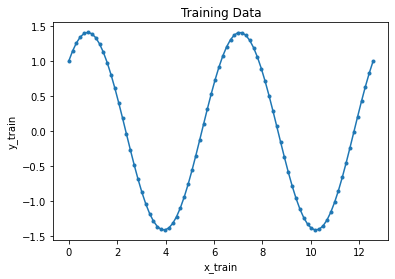

In [545]:
plt.plot(x_train, y_train, marker='.')
plt.title('Training Data')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

### Define Data Hooks:

In [546]:
X = tf.compat.v1.placeholder(tf.float32,shape=[None,data_feature_dim])  
y = tf.compat.v1.placeholder(tf.float32,shape=[None,label_feature_dim])

### Define Tensorflow Variables:
Here, we set the number of nodes in each hidden layer to 55. This value was determined by trial and error during repeated training and testing. The weights and biases are initialized using the Xavier Glorot initialization method. 

In [866]:
hidden_feature_dim = 55; 

In [867]:
w0 = tf.Variable(tf.random.truncated_normal(shape=(data_feature_dim,hidden_feature_dim),mean=np.random.rand(1,1),\
                                           stddev = math.sqrt(3.0)/(data_feature_dim*hidden_feature_dim)),dtype=np.float32) ;
w1 = tf.Variable(tf.random.truncated_normal(shape=(hidden_feature_dim,label_feature_dim),mean=np.random.rand(1,1),\
                                           stddev = math.sqrt(3.0)/(data_feature_dim*label_feature_dim)),dtype=np.float32);


bvec = tf.Variable(tf.random.truncated_normal(shape=(hidden_feature_dim,1),mean=np.random.rand(1,1),\
                                           stddev = math.sqrt(3.0)/2),dtype=np.float32) ;
bscalar = tf.Variable(tf.random.truncated_normal(shape=(1,1),mean=np.random.rand(1,1),\
                                           stddev = math.sqrt(3.0)),dtype=np.float32) ;

### Define Neural Network Layers:
Here, we define our neural network to have only a single hidden layer, wherein each node uses a ReLU activation function. After this hidden layer, we perform another affine transformation with weights and a bias term (which are to be learned) so that we can generate a scalar output as desired. 

In [868]:
z = tf.nn.relu(tf.add(tf.matmul(X,w0),tf.transpose(bvec))) 
yhat = tf.add(tf.matmul(z, w1), bscalar)

### Define Loss Function:
Here, we use the suggested Loss Function, so that our learning algorithm minimizes the average 2-norm between the labels and the values estimated for each corresponding input data point. 

In [869]:
Loss_Function = tf.reduce_mean(tf.linalg.norm((yhat)-y))

### Initialize Variables and Train the Neural Network:
Below, we set the learning rate to 0.45, which was selected through trial-and-error during numerous training and testing processes. Additionally, we set the number of epochs to 300,000 -- a value which was chosen such that the training loss converged satisfactorily, after having identified effective choices for the number of nodes and the learning rate. 

In [878]:
show_every=1000
Learning_Rate = 0.45; 
Session_Optimizer = tf.compat.v1.train.AdagradOptimizer(Learning_Rate).minimize(Loss_Function);
result = sess.run(tf.compat.v1.global_variables_initializer());
epochs = 300000

In [879]:
#Learning_Rate = 0.001;
for i in range(epochs):
    sess.run(Session_Optimizer,feed_dict={X:x_train,y:y_train})
    if i % show_every ==0: 
        cur_loss_train = sess.run(Loss_Function,feed_dict={X:x_train,y:y_train}); 
#        cur_loss_val = sess.run(Loss_Function,feed_dict={X:x_val,y:y_val}); 
        print("Training loss at Epoch # ", i , "is : ", cur_loss_train/y_train.shape[0])
#        print("Validation loss at Epoch # ", i , "is : ", cur_loss_val/y_val.shape[0])

Training loss at Epoch #  0 is :  14.014697265625
Training loss at Epoch #  1000 is :  0.06403679251670838
Training loss at Epoch #  2000 is :  0.05446866154670715
Training loss at Epoch #  3000 is :  0.04890056550502777
Training loss at Epoch #  4000 is :  0.04515074789524078
Training loss at Epoch #  5000 is :  0.03094344437122345
Training loss at Epoch #  6000 is :  0.024161036312580108
Training loss at Epoch #  7000 is :  0.020911504328250886
Training loss at Epoch #  8000 is :  0.018642094731330872
Training loss at Epoch #  9000 is :  0.017125210165977477
Training loss at Epoch #  10000 is :  0.015870991349220275
Training loss at Epoch #  11000 is :  0.014957444369792938
Training loss at Epoch #  12000 is :  0.014050443470478059
Training loss at Epoch #  13000 is :  0.013074773550033569
Training loss at Epoch #  14000 is :  0.012754231691360474
Training loss at Epoch #  15000 is :  0.012201730161905289
Training loss at Epoch #  16000 is :  0.011718784272670747
Training loss at Epo

### Plot Fit to Training Data:
Below, we plot the input and labels from the training data on the same axes as the neural network's estimates of the labels, to visualize the performance of the network. The plot shows that the neural network does well to approximate the desired function over the training data set, as expected. 

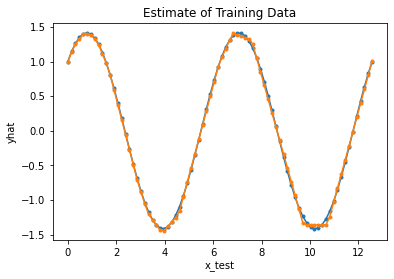

In [881]:
yest_train = yhat.eval(feed_dict={X:x_train,y:y_train})
plt.plot(x_train, y_train, marker='.')
plt.title('Testing Data')
plt.xlabel('x_train')
plt.ylabel('y_train')

plt.plot(x_train, yest_train, marker='.')
plt.title('Estimate of Training Data')
plt.xlabel('x_test')
plt.ylabel('yhat')

plt.show()

### Plot Fit to Testing Data:
Below, we compute the neural network's estimates of the labels for the inputs from the testing data set, and plot these alongside the known labels for the testing data set. As shown in the plot below, the network also does well to approximate the desired function over the testing data set. 

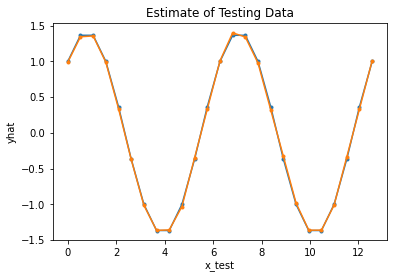

In [883]:
yest = yhat.eval(feed_dict={X:x_test,y:y_test})
plt.plot(x_test, y_test, marker='.')
plt.title('Testing Data')
plt.xlabel('x_test')
plt.ylabel('y_test')

plt.plot(x_test, yest, marker='.')
plt.title('Estimate of Testing Data')
plt.xlabel('x_test')
plt.ylabel('yhat')

plt.show()

### Compute Average Loss Function over Testing Data:
Below, we evaluate the average of the 2-norm of the error between the true testing data labels and the predictions generated by the neural network. The final value is approximately 0.0182, which satisfies our performance benchmark of an average 2-norm error of 0.02. 

In [884]:
err = yest - y_test
sq_err = np.multiply(err, err)
pwr = np.full((len(sq_err), 1), 0.5)
rtsq_err = np.power(sq_err, pwr)
TestLoss = np.mean(rtsq_err)

print(TestLoss)

0.01820849539393964


### Examine the Learned Weights and Biases:
Below, we print out the learned weight vectors and biases which enabled the neural network to accurately approximate the desired function. 

In [891]:
w0.eval()

array([[-0.24938521, -0.24472381, -0.25749278, -0.23714861, -0.28860784,
        -0.27018756, -0.39808387,  0.02556676, -0.55576426, -0.4736335 ,
        -0.2854075 , -0.46949157, -0.49731323, -0.31229168, -0.15816173,
        -1.2685381 , -0.33446997, -0.2591992 , -0.30306527, -0.28949463,
         0.0558756 , -0.23272447, -0.26330873, -0.28351793, -0.2825424 ,
        -0.22888789,  0.01430927, -0.28603864, -0.27135837, -0.22944047,
        -0.39802936,  0.5385938 , -0.32003573, -0.270346  , -0.29280284,
        -0.7914454 , -0.30218458, -0.44542953, -0.25714898, -0.4879706 ,
        -0.28350344, -0.3148228 , -0.28060937, -0.5092823 , -0.27862924,
         0.01477948, -0.40525514, -0.23535055,  0.02641605, -0.22759426,
        -0.2610164 , -0.29102296, -0.25372413, -0.10001864, -0.38096833]],
      dtype=float32)

In [892]:
w1.eval()

array([[ 1.3754811 ],
       [-0.38378373],
       [ 1.026611  ],
       [-0.11479155],
       [ 1.1893537 ],
       [ 0.5994743 ],
       [ 2.2944055 ],
       [-2.35486   ],
       [ 1.5601737 ],
       [ 1.1950318 ],
       [-0.23086548],
       [-1.8730085 ],
       [ 2.5090687 ],
       [ 0.61336726],
       [-1.4357195 ],
       [-0.43728444],
       [ 1.7508043 ],
       [ 1.6391706 ],
       [ 1.5288627 ],
       [ 0.5403108 ],
       [-0.2800804 ],
       [ 1.6231396 ],
       [ 0.58030534],
       [ 0.8197166 ],
       [ 2.6036775 ],
       [ 0.4938833 ],
       [-2.2650054 ],
       [ 0.77035713],
       [ 2.290723  ],
       [ 0.83627045],
       [-0.722266  ],
       [ 2.3868334 ],
       [ 0.3726106 ],
       [-0.35540536],
       [ 2.1674464 ],
       [-0.61789626],
       [ 0.8815082 ],
       [-1.2394506 ],
       [ 1.3636835 ],
       [-2.2956936 ],
       [-0.30798683],
       [ 2.9254518 ],
       [ 1.1011337 ],
       [-1.0005864 ],
       [ 2.9593844 ],
       [-0

In [893]:
bvec.eval()

array([[-1.4007357e-01],
       [-9.0334320e-01],
       [-2.2408646e-01],
       [ 2.2626352e-01],
       [-1.1550488e+00],
       [-3.0661932e-01],
       [ 1.8224185e+00],
       [-6.7146027e-01],
       [ 2.1641967e+00],
       [ 1.5733600e+00],
       [-1.8168552e+00],
       [ 3.2002378e+00],
       [ 4.8379717e+00],
       [-1.7237964e-01],
       [-2.6433229e-02],
       [ 8.7679148e-01],
       [-5.7101911e-01],
       [-1.9501787e+00],
       [-1.1068946e+00],
       [-6.3868105e-01],
       [-1.0180948e+00],
       [-3.0003268e-01],
       [-6.1380255e-01],
       [-4.5841960e-03],
       [-9.0472364e-01],
       [-1.5255225e-01],
       [-7.4472195e-01],
       [-2.0626178e-01],
       [-1.7420366e+00],
       [-8.5608923e-01],
       [ 4.0112641e-01],
       [-5.7749209e+00],
       [-4.7442615e-01],
       [-2.5853372e-01],
       [-2.3933199e-01],
       [ 2.1447504e-01],
       [-5.7030469e-04],
       [ 2.7900002e+00],
       [-9.2750835e-01],
       [ 3.7028251e+00],


In [894]:
bscalar.eval()

array([[-1.3610994]], dtype=float32)

### Conclusion:
In summary, this was a friendly introduction to the process of training a neural network. We generated training and testing data, selected an architecture for the neural network, utilized Tensorflow to train the network, and evaluated the performance after training. The most challenging aspect was simply experimenting with numerous options for the network architecture, and tuning hyperparameters including the learning rate and the number of epochs such that the desired performance was achieved. Having successfully trained a neural network for the first time is satisfying and exciting. 